In [1]:
# setting up necessarry library/tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [2]:
# opening dataset 'Toqy_User_Activity.csv' file and assign it into 'tua' variable then parsing it
tua = pd.read_csv('data/Toqy_User_Activity.csv', sep=';')

In [3]:
# checking info of our dataset
tua.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263436 entries, 0 to 263435
Data columns (total 15 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   event_timestamp             263436 non-null  float64
 1   event_date                  263436 non-null  int64  
 2   event_name                  263436 non-null  object 
 3   engagement_time_msec        224431 non-null  float64
 4   product_id                  131 non-null     object 
 5   event_value_in_usd          131 non-null     float64
 6   user_pseudo_id              263436 non-null  object 
 7   user_first_touch_timestamp  263433 non-null  float64
 8   country                     263389 non-null  object 
 9   region                      263235 non-null  object 
 10  city                        187560 non-null  object 
 11  source                      263436 non-null  object 
 12  medium                      263436 non-null  object 
 13  campaign      

In [4]:
# checking first 5 rows & last 5 rows of our dataset
tua

,event_timestamp,event_date,event_name,engagement_time_msec,product_id,event_value_in_usd,user_pseudo_id,user_first_touch_timestamp,country,region,city,source,medium,campaign,platform
0,1.570000e+15,20191101,user_engagement,79048.0,NaN,NaN,de215892cec87549c9d67f93fcb0ca2b,1.560000e+15,Indonesia,East Java,Surabaya,(direct),(none),(direct),ANDROID
1,1.570000e+15,20191101,user_engagement,161468.0,NaN,NaN,6bea39ae2126a2c0baf52b3293a8a560,1.570000e+15,Indonesia,South Sulawesi,Makassar,google-play,organic,NaN,ANDROID
2,1.570000e+15,20191101,user_engagement,1263835.0,NaN,NaN,528eafa55de5dedc16434728669a6096,1.570000e+15,Indonesia,West Java,Bandung,google-play,organic,NaN,ANDROID
3,1.570000e+15,20191101,session_start,NaN,NaN,NaN,14be5bb3483b11db5a5f057d67d09cd3,1.570000e+15,Indonesia,Jakarta,NaN,google-play,organic,NaN,ANDROID
4,1.570000e+15,20191101,user_engagement,14432.0,NaN,NaN,14be5bb3483b11db5a5f057d67d09cd3,1.570000e+15,Indonesia,Jakarta,NaN,google-play,organic,NaN,ANDROID
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263431,1.570000e+15,20191107,user_engagement,50015.0,NaN,NaN,9d961a4ed47a269452f325d11083f088,1.570000e+15,Indonesia,East Java,Surabaya,google-play,organic,NaN,ANDROID
263432,1.570000e+15,20191107,user_engagement,25023.0,NaN,NaN,383e8d3edecf34b3466ce4789550aab8,1.570000e+15,Indonesia,Special Region of Yogyakarta,Yogyakarta,(direct),(none),(direct),ANDROID
263433,1.570000e+15,20191107,user_engagement,6718.0,NaN,NaN,383e8d3edecf34b3466ce4789550aab8,1.570000e+15,Indonesia,Special Region of Yogyakarta,Yogyakarta,(direct),(none),(direct),ANDROID
263434,1.570000e+15,20191107,user_engagement,33107.0,NaN,NaN,02d1f7d0f5a82b289c1978fa9ee8064e,1.570000e+15,Indonesia,Jakarta,NaN,google-play,organic,NaN,ANDROID


In [5]:
# as we can see above, the 'event_date' column is int datatype. we will convert it to datetime datatype
# also from now on we're gonna assume 'engagement_time_msec' is milisecond
# and we're going to create a new column named 'engagement_time_sec'. which is basically converting milisecond to second

In [6]:
# converting 'event_date' to datetime
tua['event_date'] = pd.to_datetime(tua['event_date'], format='%Y%m%d')
tua['event_date'] = tua['event_date'].dt.date

In [7]:
# creating a new column named 'engagement_time_sec' and converting milisecond to second
tua['engagement_time_sec'] = (tua['engagement_time_msec']/1000).round(2)

In [8]:
# checking our dataset again to see the changes we just commit
tua

,event_timestamp,event_date,event_name,engagement_time_msec,product_id,event_value_in_usd,user_pseudo_id,user_first_touch_timestamp,country,region,city,source,medium,campaign,platform,engagement_time_sec
0,1.570000e+15,2019-11-01,user_engagement,79048.0,NaN,NaN,de215892cec87549c9d67f93fcb0ca2b,1.560000e+15,Indonesia,East Java,Surabaya,(direct),(none),(direct),ANDROID,79.05
1,1.570000e+15,2019-11-01,user_engagement,161468.0,NaN,NaN,6bea39ae2126a2c0baf52b3293a8a560,1.570000e+15,Indonesia,South Sulawesi,Makassar,google-play,organic,NaN,ANDROID,161.47
2,1.570000e+15,2019-11-01,user_engagement,1263835.0,NaN,NaN,528eafa55de5dedc16434728669a6096,1.570000e+15,Indonesia,West Java,Bandung,google-play,organic,NaN,ANDROID,1263.84
3,1.570000e+15,2019-11-01,session_start,NaN,NaN,NaN,14be5bb3483b11db5a5f057d67d09cd3,1.570000e+15,Indonesia,Jakarta,NaN,google-play,organic,NaN,ANDROID,NaN
4,1.570000e+15,2019-11-01,user_engagement,14432.0,NaN,NaN,14be5bb3483b11db5a5f057d67d09cd3,1.570000e+15,Indonesia,Jakarta,NaN,google-play,organic,NaN,ANDROID,14.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263431,1.570000e+15,2019-11-07,user_engagement,50015.0,NaN,NaN,9d961a4ed47a269452f325d11083f088,1.570000e+15,Indonesia,East Java,Surabaya,google-play,organic,NaN,ANDROID,50.02
263432,1.570000e+15,2019-11-07,user_engagement,25023.0,NaN,NaN,383e8d3edecf34b3466ce4789550aab8,1.570000e+15,Indonesia,Special Region of Yogyakarta,Yogyakarta,(direct),(none),(direct),ANDROID,25.02
263433,1.570000e+15,2019-11-07,user_engagement,6718.0,NaN,NaN,383e8d3edecf34b3466ce4789550aab8,1.570000e+15,Indonesia,Special Region of Yogyakarta,Yogyakarta,(direct),(none),(direct),ANDROID,6.72
263434,1.570000e+15,2019-11-07,user_engagement,33107.0,NaN,NaN,02d1f7d0f5a82b289c1978fa9ee8064e,1.570000e+15,Indonesia,Jakarta,NaN,google-play,organic,NaN,ANDROID,33.11


In [9]:
# checking all columns in our dataset
tua.columns

Index(['event_timestamp', 'event_date', 'event_name', 'engagement_time_msec',
       'product_id', 'event_value_in_usd', 'user_pseudo_id',
       'user_first_touch_timestamp', 'country', 'region', 'city', 'source',
       'medium', 'campaign', 'platform', 'engagement_time_sec'],
      dtype='object')

In [10]:
# checking the shape or how many rows and columns of our dataset
# this data consists of 263436 rows and 16 columns, it's not 15 columns because we just create a new column named 'engagement_time_sec'
tua.shape

(263436, 16)

In [11]:
# calculating how many kinds of 'user_pseudo_id' that occurrs in our data
# as we can see here, we have 9015 kinds of 'user_pseudo_id' that means we have 9015 active user in 7 days
upid = tua['user_pseudo_id'].nunique()
print(upid)

9015


In [12]:
# calculating how many active users for each date
upided = tua.groupby('event_date')['user_pseudo_id'].nunique()
upided

event_date
2019-11-01    1760
2019-11-02    2710
2019-11-03    3273
2019-11-04    2537
2019-11-05    2727
2019-11-06    2688
2019-11-07    2934
Name: user_pseudo_id, dtype: int64

<AxesSubplot:xlabel='event_date', ylabel='active user'>

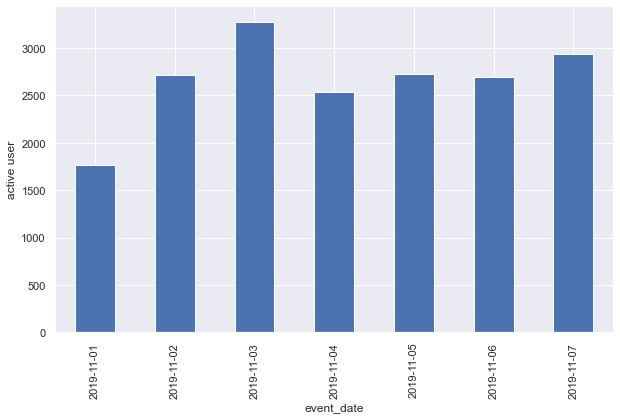

In [13]:
# active users for each date in bar chart
plt.figure(figsize=(10,6))
upided.plot.bar(ylabel=('active user'))

In [14]:
# calculating some basic statistical details of 'engagement_time_sec' column
# note: just ignore the last .00 in count
# count is how many elements, mean is the average, std is standard deviation or a measure of how spread out numbers are
# min is te minimum value, 25% is the first quartile, 50% is the middle value of data or median, 75% is the second quartile
# max is the maximum value
tua['engagement_time_sec'].describe().round(2)

count    224431.00
mean        187.09
std         384.74
min           0.00
25%          11.96
50%          32.33
75%         167.60
max        7083.59
Name: engagement_time_sec, dtype: float64

In [15]:
# calculating the sum of 'engagement_time_sec' for each date
etsed = tua.groupby('event_date')['engagement_time_sec'].sum()
etsed

event_date
2019-11-01    3007332.73
2019-11-02    6367128.01
2019-11-03    8997924.48
2019-11-04    5298817.55
2019-11-05    5701419.09
2019-11-06    6021589.64
2019-11-07    6593850.01
Name: engagement_time_sec, dtype: float64

<AxesSubplot:xlabel='event_date', ylabel='engagement_time_sec'>

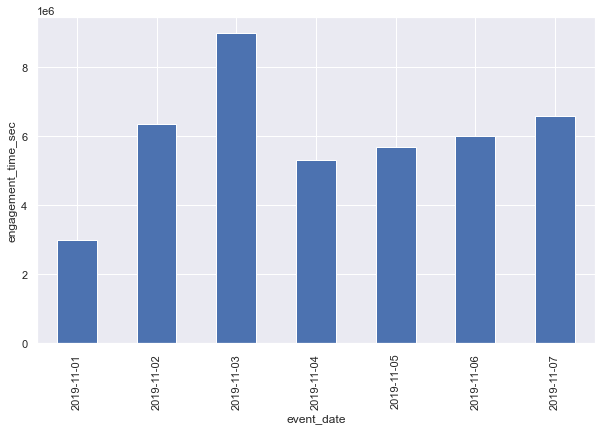

In [16]:
# sum of 'engagement_time_sec' for each date in bar chart
plt.figure(figsize=(10,6))
etsed.plot.bar(ylabel=('engagement_time_sec'))

In [17]:
# calculating the sum of all 'engagement_time_sec' in 7 days
etssum = tua['engagement_time_sec'].sum()
etssum

41988061.51

In [18]:
# calculating the average of how many 'engagement_time_sec' per active user for each date
etsed/upided

event_date
2019-11-01    1708.711778
2019-11-02    2349.493731
2019-11-03    2749.136719
2019-11-04    2088.615510
2019-11-05    2090.729406
2019-11-06    2240.174717
2019-11-07    2247.392641
dtype: float64

<AxesSubplot:xlabel='event_date', ylabel='engagement_time_sec/active user'>

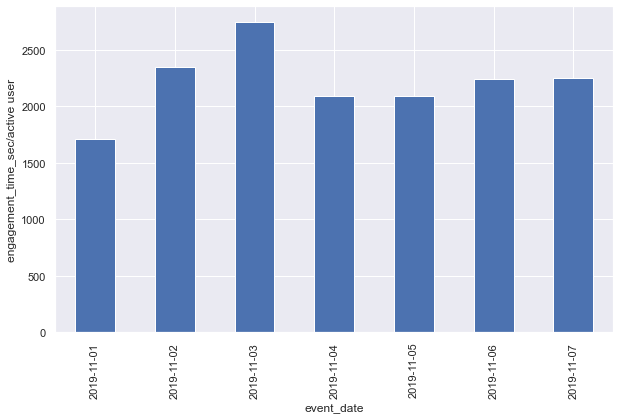

In [19]:
# the average of how many 'engagement_time_sec' per active user for each date in bar chart
plt.figure(figsize=(10,6))
(etsed/upided).plot.bar(ylabel=('engagement_time_sec/active user'))

In [20]:
# calculating the average of how many 'engagement_time_sec' per active user in 7 days
(etssum/upid).round(2)

4657.58

In [21]:
# calculating how many users become paying user in 7 days
temp = tua.groupby('user_pseudo_id')['event_value_in_usd'].count() > 0
pu = 0
for i in temp:
    if i == True:
        pu += 1
pu

81

In [22]:
# as we can see above, the result is 81 out of 9015, which means the conversion rate is 0.9%

In [23]:
# calculating transactions frequency for each date
tua.groupby('event_date')['event_value_in_usd'].count()

event_date
2019-11-01     5
2019-11-02    20
2019-11-03    22
2019-11-04    17
2019-11-05    28
2019-11-06    17
2019-11-07    22
Name: event_value_in_usd, dtype: int64

<AxesSubplot:xlabel='event_date', ylabel='transactions frequency'>

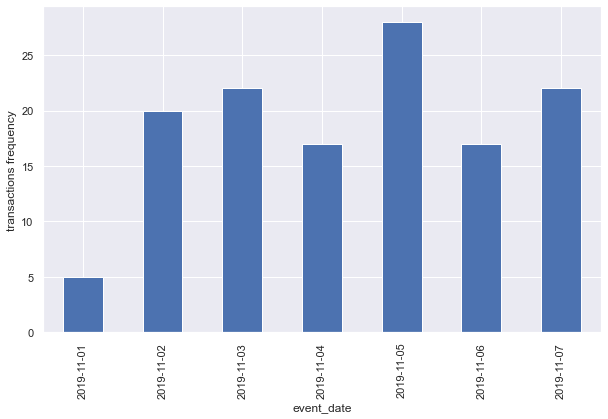

In [24]:
# transactions frequency for each date in bar chart
plt.figure(figsize=(10,6))
tua.groupby('event_date')['event_value_in_usd'].count().plot.bar(ylabel=('transactions frequency'))

In [25]:
# calculating some basic statistical details of 'event_value_in_usd' column
# note: just ignore the last .000000 in count
tua['event_value_in_usd'].describe()

count    131.000000
mean       3.547844
std        1.147724
min        2.672984
25%        2.705156
50%        3.057738
75%        3.924114
max        8.345597
Name: event_value_in_usd, dtype: float64

In [26]:
# calculating the sum of revenue in USD for each date
tua.groupby('event_date')['event_value_in_usd'].sum()

event_date
2019-11-01    14.648016
2019-11-02    64.019722
2019-11-03    74.072454
2019-11-04    60.721237
2019-11-05    96.759726
2019-11-06    59.928714
2019-11-07    94.617632
Name: event_value_in_usd, dtype: float64

<AxesSubplot:xlabel='event_date', ylabel='revenue in USD'>

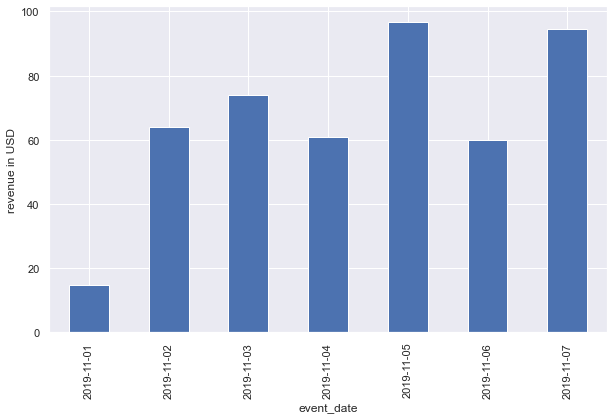

In [27]:
# sum of revenue for each date in bar chart
plt.figure(figsize=(10,6))
tua.groupby('event_date')['event_value_in_usd'].sum().plot.bar(ylabel=('revenue in USD'))

In [28]:
# calculating the sum of revenue in 7 days
usdsum = tua['event_value_in_usd'].sum()
print(usdsum)

464.76750100000004


In [29]:
# calculating average revenue per paying users
# 464.76750100000004 / 81
(usdsum/pu).round(3)

5.738

In [30]:
# calculating average revenue per active user
# 464.76750100000004 / 9015
(usdsum/upid).round(3)

0.052

In [31]:
# creating a new table to prove that total of 'engagement_time_sec' affecting total revenue for each date
tempdata = {'date':  ['2019-11-01', '2019-11-02', '2019-11-03', '2019-11-04', '2019-11-05', '2019-11-06', '2019-11-07'],
            'etssum':  [3007332.73, 6367128.01, 8997924.48, 5298817.55, 5701419.09, 6021589.64, 6593850.01],
            'revenuesum': [14.648016, 64.019722, 74.072454, 60.721237, 96.759726, 59.928714, 94.617632]
            }
tempdf = pd.DataFrame (tempdata, columns = ['date', 'etssum', 'revenuesum'])
tempdf.set_index('date')

,etssum,revenuesum
date,,
2019-11-01,3007332.73,14.648016
2019-11-02,6367128.01,64.019722
2019-11-03,8997924.48,74.072454
2019-11-04,5298817.55,60.721237
2019-11-05,5701419.09,96.759726
2019-11-06,6021589.64,59.928714
2019-11-07,6593850.01,94.617632


In [32]:
# checking correlation coefficient between sum of 'engagement_time_sec' and sum of revenue
tempdf.corr()

,etssum,revenuesum
etssum,1.000000,0.642096
revenuesum,0.642096,1.000000


In [33]:
# as we can see above, the result is 0.642096, which is considered moderate positive relationship
# that means, the higher the values in 'engagement_time_sec' could make the revenue get higher too

<AxesSubplot:xlabel='etssum', ylabel='revenuesum'>

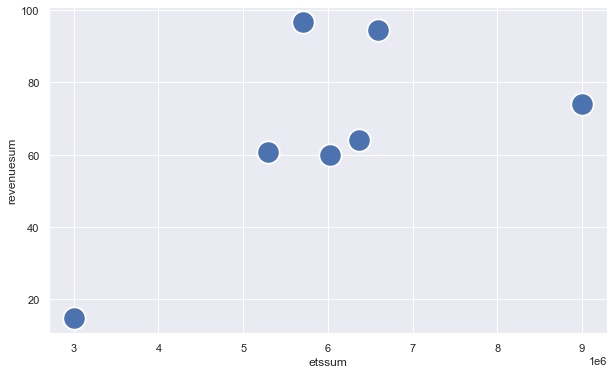

In [34]:
# scatter plot of sum 'engagement_time_sec' and sum revenue for each date
# etssum is the sum of 'engagement_time_sec' and revenuesum is the sum of revenue
plt.figure(figsize=(10,6))
sns.scatterplot(data=tempdf, x='etssum', y='revenuesum', s=500)

<AxesSubplot:>

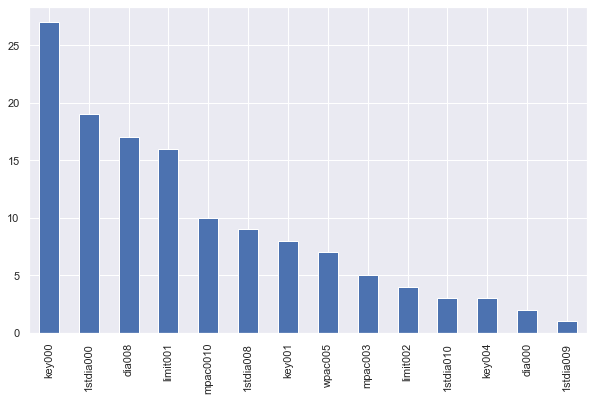

In [35]:
# calculating frequency for each kinds of 'product_id' that occurs in our data
plt.figure(figsize=(10,6))
tua['product_id'].value_counts().plot.bar()

In [36]:
# calculating frequency for each kinds of 'product_id' for each date
tua.groupby('event_date')['product_id'].value_counts()

event_date  product_id
2019-11-01  limit002      2
            1stdia000     1
            dia008        1
            key000        1
2019-11-02  1stdia000     5
            key000        5
            dia008        2
            key001        2
            wpac005       2
            1stdia008     1
            dia000        1
            mpac0010      1
            mpac003       1
2019-11-03  key000        7
            1stdia000     3
            wpac005       3
            mpac0010      2
            1stdia008     1
            1stdia009     1
            key001        1
            key004        1
            limit001      1
            limit002      1
            mpac003       1
2019-11-04  limit001      4
            1stdia008     3
            key000        2
            key001        2
            wpac005       2
            1stdia000     1
            dia000        1
            mpac0010      1
            mpac003       1
2019-11-05  dia008        7
            key000       

<AxesSubplot:xlabel='region', ylabel='count'>

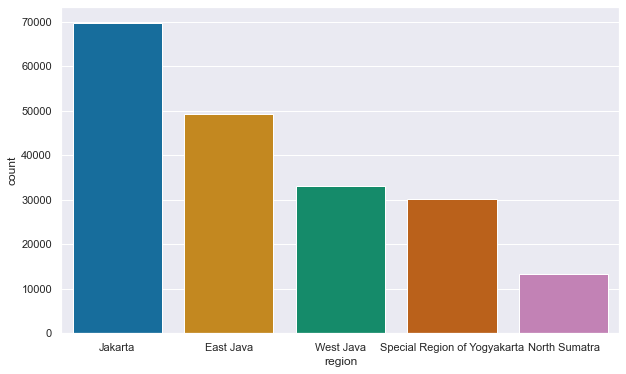

In [37]:
# checking top 5 'region' that occurs in our data
plt.figure(figsize=(10,6))
sns.countplot(x='region', data=tua, palette='colorblind', order=tua['region'].value_counts().iloc[:5].index)